# Create saved labeledDataFrames for synthetic datasets

In [1]:
import mlsim
import detect_simpsons_paradox as dsp
import numpy as np
import string
from mlsim import sp_plot

In [2]:
n_view = 20
r_clusters =     [-.8, .5, .4, .7, -.6, .5, .4,-.9]  # magnitude correlation coefficient of clusters
cluster_spread = [ .3,-.2, .1,-.4, .2, -.1, .2,.4] # pearson correlation of means
p_sp_clusters =  [  1,  0,  0,  0,  1,   0,  0,  1] # portion of clusters with SP  #1 if r neg 0 if rpos
k =              [5,   3,  6,  4,  2,   3,  4, 5] # number of clusters
cluster_size =   [2,  3]#
domain_range = [0, 20, 0, 20] # of all data
N = 200 # number of points total
p_clusters = [np.random.dirichlet([k_i*2]*k_i) for k_i in k]


many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)
# print largest and smallest cluster sizes
print([many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])])
print([many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])])

[24, 28, 18, 34, 8, 24, 26, 20, 28, 44, 58, 42, 36, 34, 30, 18, 24, 26, 18, 24]
[56, 66, 128, 114, 50, 54, 86, 84, 172, 156, 84, 112, 78, 76, 50, 58, 60, 124, 50, 88]


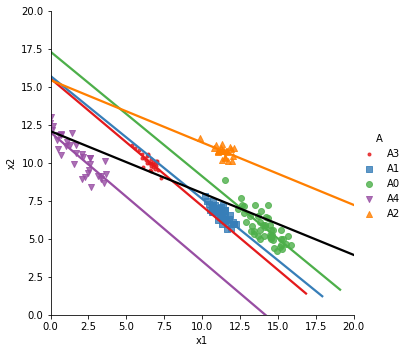

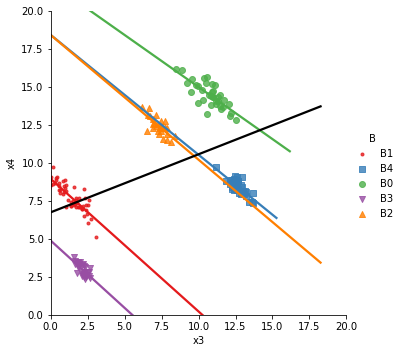

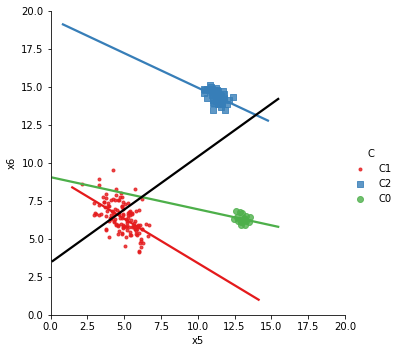

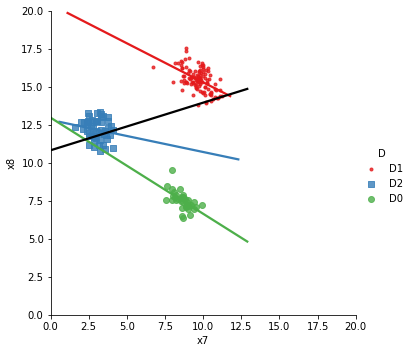

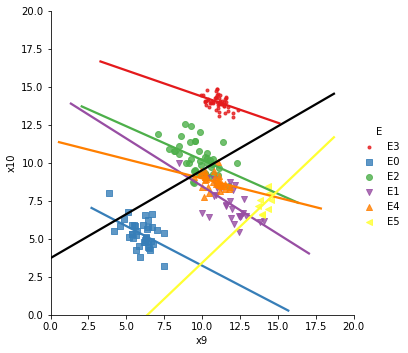

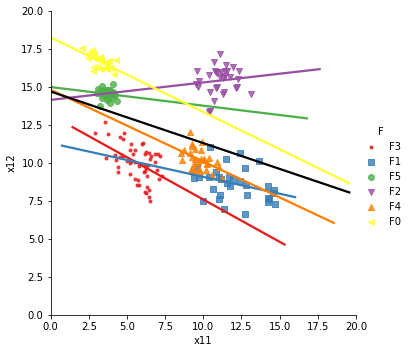

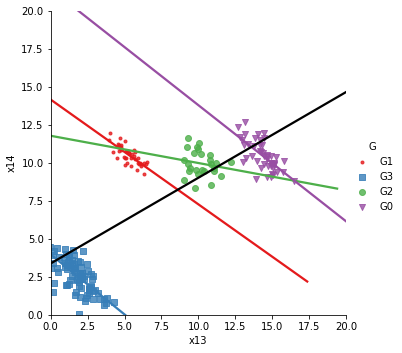

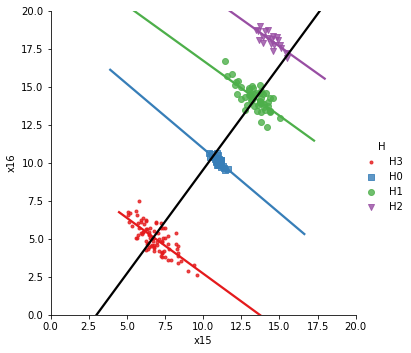

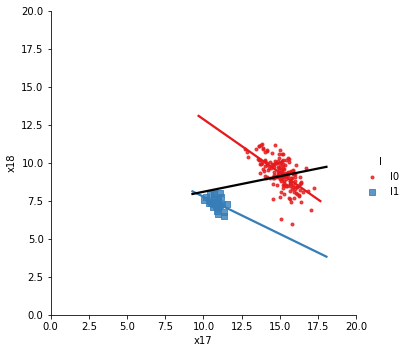

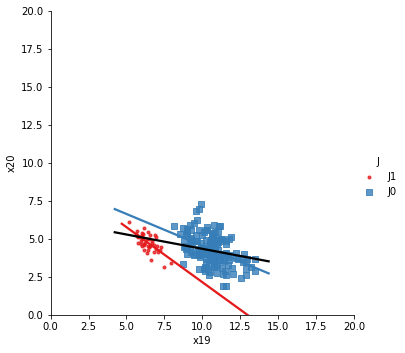

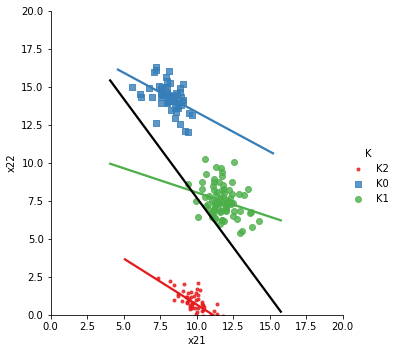

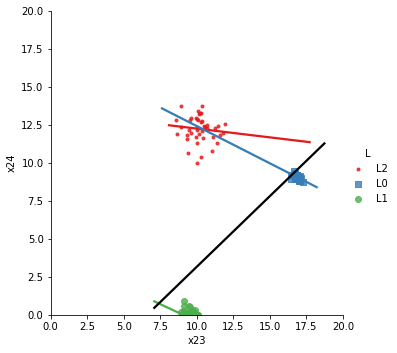

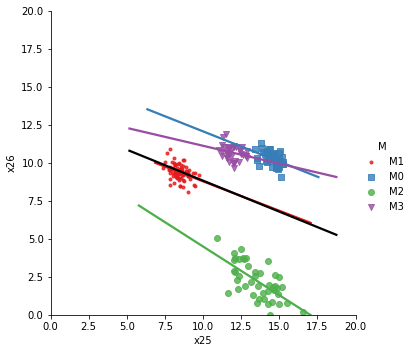

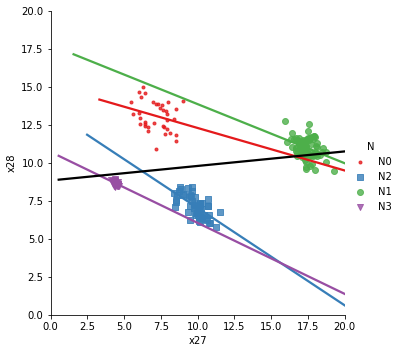

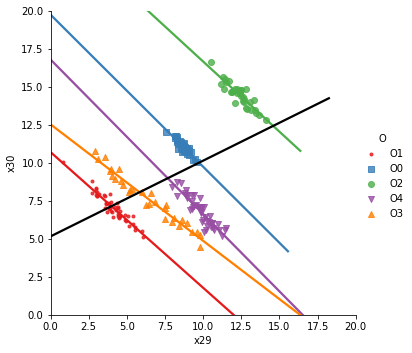

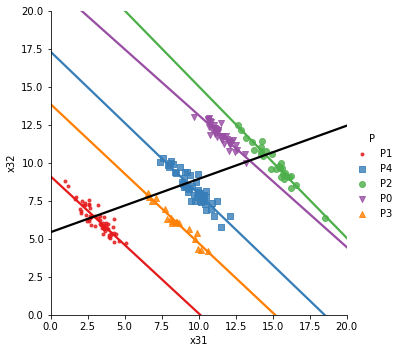

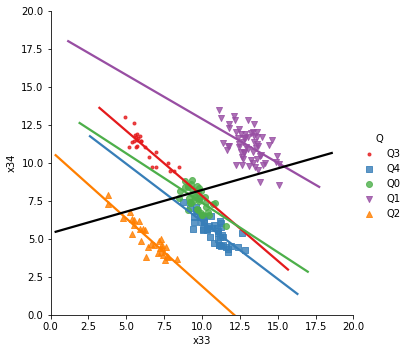

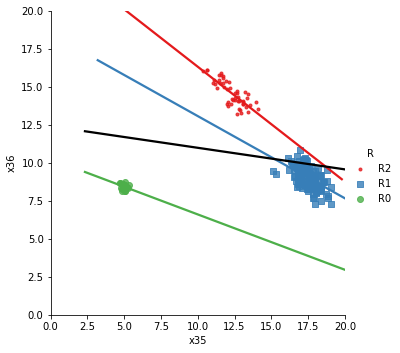

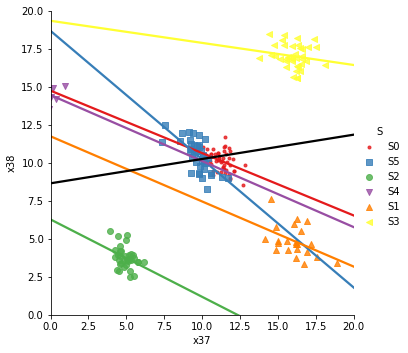

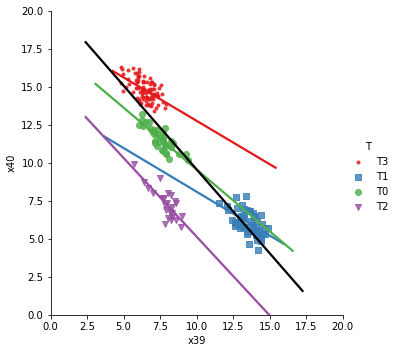

In [3]:
view_list = [('x'+str(i+1),'x'+str(i+2),c) for i,c in zip(range(0,n_view*2,2),list(string.ascii_uppercase[:n_view]))]

for view in view_list:
    sp_plot(many_sp_df,*view)
    
# sp_plot(many_sp_df,'x3','x4','B')

# many_sp_df.head()

In [5]:
labeled_df = dsp.labeledDataFrame(many_sp_df)

In [6]:
roles = {'x'+str(i+1):'trend' for i in range(n_view*2)}
roles.update( {c:['groupby','trend'] for c in list(string.ascii_uppercase[:n_view])})
count_list = []
var_types = {'x'+str(i+1):'continuous' for i in range(n_view*2)}
var_types.update( {c:'categorical' for c in list(string.ascii_uppercase[:n_view])})
weighting = {}

# labeled_df.set_weighting_vars(weighting)


labeled_df.set_counts(count_list)
labeled_df.set_roles(roles)
labeled_df.set_var_types(var_types)
labeled_df.meta_df

/home/smb/anaconda3/lib/python3.6/site-packages/detect_simpsons_paradox/labeled_dataframe.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.meta_df['role'][k] = v
/home/smb/anaconda3/lib/python3.6/site-packages/detect_simpsons_paradox/labeled_dataframe.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.meta_df['var_type'][k] = v


,dtype,var_type,role,isCount,weighting_var
variable,,,,,
x1,float64,continuous,trend,False,NaN
x2,float64,continuous,trend,False,NaN
x3,float64,continuous,trend,False,NaN
x4,float64,continuous,trend,False,NaN
x5,float64,continuous,trend,False,NaN
x6,float64,continuous,trend,False,NaN
x7,float64,continuous,trend,False,NaN
x8,float64,continuous,trend,False,NaN
x9,float64,continuous,trend,False,NaN


In [7]:
labeled_df.to_csvs('../data/synthetic_continuous_20_allsp_rank')

In [7]:
for alpha in [.1,1,2,5,7,10,100,200]:
    for i in range(4):
        p_clusters = [np.random.dirichlet([alpha]*k_i) for k_i in k]


        many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                        domain_range,k,N,p_clusters)
        # print largest and smallest cluster sizes
        print('alpha = ',alpha)
        mins = [many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])]
        maxs = [many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])]
        print('smallest',mins)
        print('largest',maxs)
        print('ratio',[np.round(b/a,2) for a,b in zip(mins,maxs)])

alpha =  0.1
smallest [6, 200, 2, 2, 200, 200, 200, 6]
largest [194, 200, 112, 194, 200, 200, 200, 102]
ratio [32.33, 1.0, 56.0, 97.0, 1.0, 1.0, 1.0, 17.0]
alpha =  0.1
smallest [8, 200, 8, 10, 8, 70, 46, 56]
largest [152, 200, 182, 166, 192, 130, 154, 144]
ratio [19.0, 1.0, 22.75, 16.6, 24.0, 1.86, 3.35, 2.57]
alpha =  0.1
smallest [2, 200, 12, 26, 84, 200, 4, 4]
largest [182, 200, 160, 88, 116, 200, 190, 196]
ratio [91.0, 1.0, 13.33, 3.38, 1.38, 1.0, 47.5, 49.0]
alpha =  0.1
smallest [2, 30, 42, 200, 92, 4, 4, 2]
largest [192, 170, 158, 200, 108, 196, 196, 156]
ratio [96.0, 5.67, 3.76, 1.0, 1.17, 49.0, 49.0, 78.0]
alpha =  1
smallest [10, 12, 2, 8, 58, 22, 14, 2]
largest [110, 124, 66, 94, 142, 136, 126, 98]
ratio [11.0, 10.33, 33.0, 11.75, 2.45, 6.18, 9.0, 49.0]
alpha =  1
smallest [20, 44, 2, 14, 78, 40, 8, 10]
largest [70, 86, 122, 136, 122, 106, 140, 70]
ratio [3.5, 1.95, 61.0, 9.71, 1.56, 2.65, 17.5, 7.0]
alpha =  1
smallest [10, 50, 10, 42, 42, 16, 22, 4]
largest [74, 96, 72, 6

In [8]:

for alpha in [.1,1,2,5,7,10,100,200]:
    for i in range(5):
        p_clusters = [np.random.dirichlet([alpha*k_i]*k_i) for k_i in k]


        many_sp_df = mlsim.geometric_indep_views_gmm_sp(n_view,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                        domain_range,k,N,p_clusters)
        # print largest and smallest cluster sizes
        print('alpha = ',alpha)
        mins = [many_sp_df[c].value_counts().min() for c in list(string.ascii_uppercase[:n_view])]
        maxs = [many_sp_df[c].value_counts().max() for c in list(string.ascii_uppercase[:n_view])]
        print('smallest',mins)
        print('largest',maxs)
        print('ratio',[np.round(b/a,2) for a,b in zip(mins,maxs)])

alpha =  0.1
smallest [8, 6, 4, 28, 200, 4, 4, 30]
largest [108, 176, 62, 140, 200, 196, 112, 72]
ratio [13.5, 29.33, 15.5, 5.0, 1.0, 49.0, 28.0, 2.4]
alpha =  0.1
smallest [4, 200, 12, 62, 66, 8, 4, 4]
largest [118, 200, 78, 72, 134, 160, 178, 98]
ratio [29.5, 1.0, 6.5, 1.16, 2.03, 20.0, 44.5, 24.5]
alpha =  0.1
smallest [8, 2, 2, 12, 44, 2, 6, 4]
largest [94, 192, 84, 188, 156, 124, 112, 124]
ratio [11.75, 96.0, 42.0, 15.67, 3.55, 62.0, 18.67, 31.0]
alpha =  0.1
smallest [6, 6, 12, 44, 12, 16, 10, 20]
largest [84, 130, 78, 100, 188, 184, 190, 110]
ratio [14.0, 21.67, 6.5, 2.27, 15.67, 11.5, 19.0, 5.5]
alpha =  0.1
smallest [6, 8, 6, 10, 2, 28, 2, 4]
largest [128, 192, 84, 140, 198, 116, 170, 108]
ratio [21.33, 24.0, 14.0, 14.0, 99.0, 4.14, 85.0, 27.0]
alpha =  1
smallest [12, 34, 18, 24, 68, 40, 32, 16]
largest [74, 128, 54, 80, 132, 94, 74, 56]
ratio [6.17, 3.76, 3.0, 3.33, 1.94, 2.35, 2.31, 3.5]
alpha =  1
smallest [32, 56, 14, 20, 94, 42, 24, 10]
largest [58, 74, 50, 72, 106, 90, 